
Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_empty-bright_eda.csv


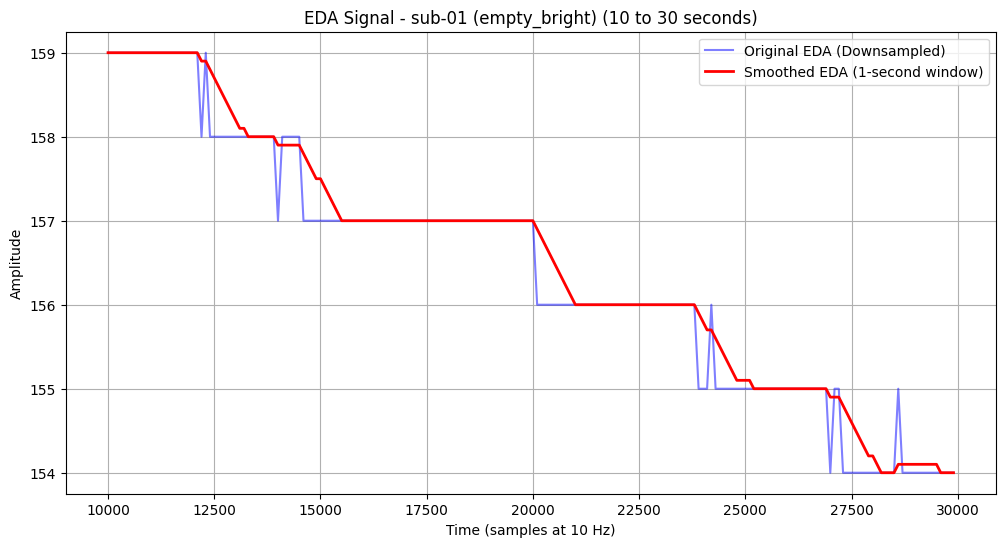

Processed /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_empty-bright_eda.csv
Original shape: 299000
Downsampled shape: 2990
Moving average shape: 2990

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_empty-dark_eda.csv


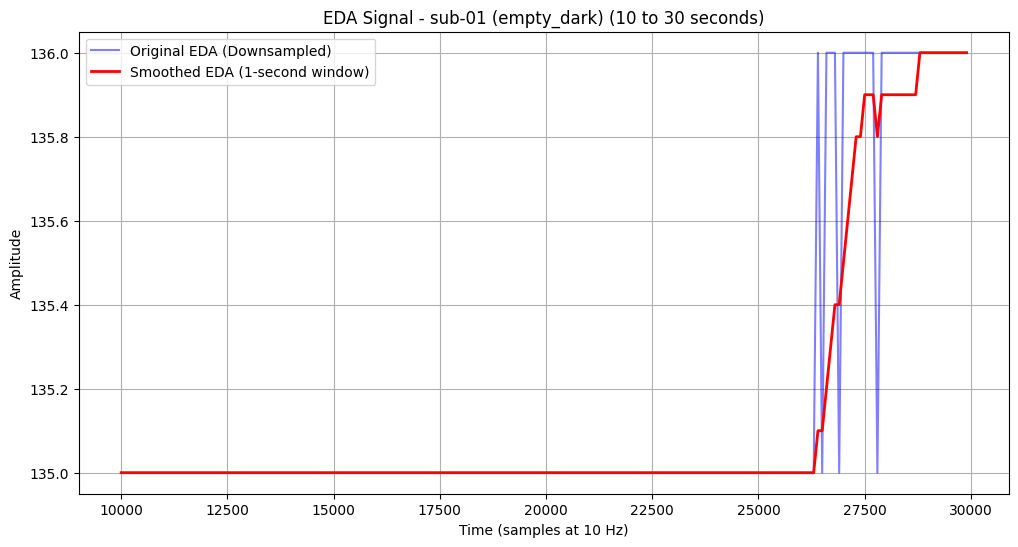

Processed /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_empty-dark_eda.csv
Original shape: 239000
Downsampled shape: 2390
Moving average shape: 2390

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_full-bright_eda.csv


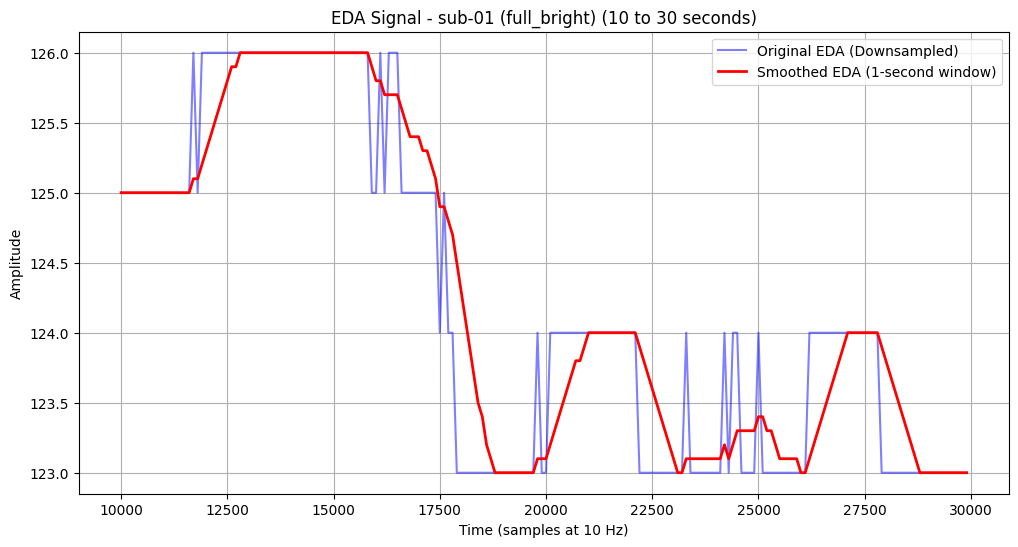

Processed /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_full-bright_eda.csv
Original shape: 359000
Downsampled shape: 3590
Moving average shape: 3590

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_full-dark_eda.csv


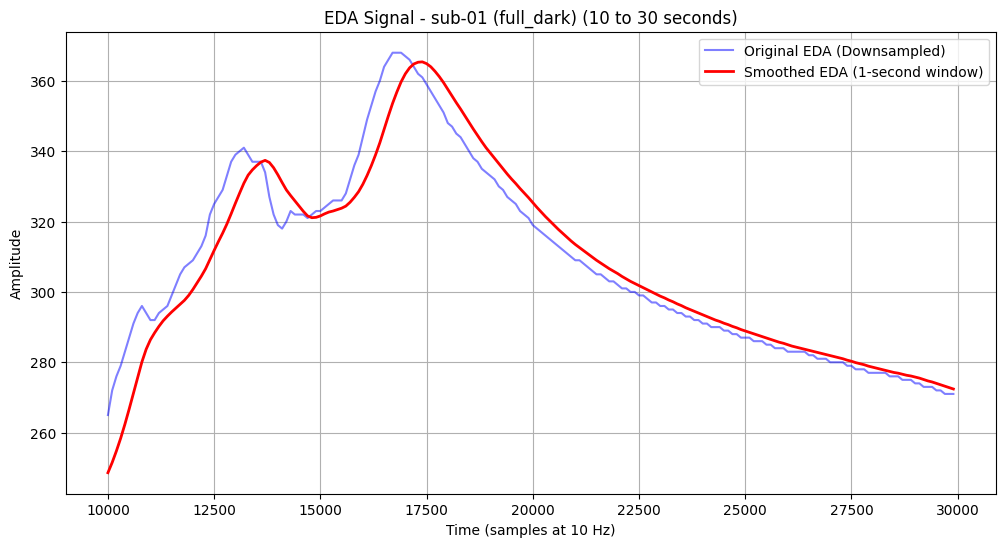

Processed /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_full-dark_eda.csv
Original shape: 180000
Downsampled shape: 1800
Moving average shape: 1800

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_empty-bright_eda.csv


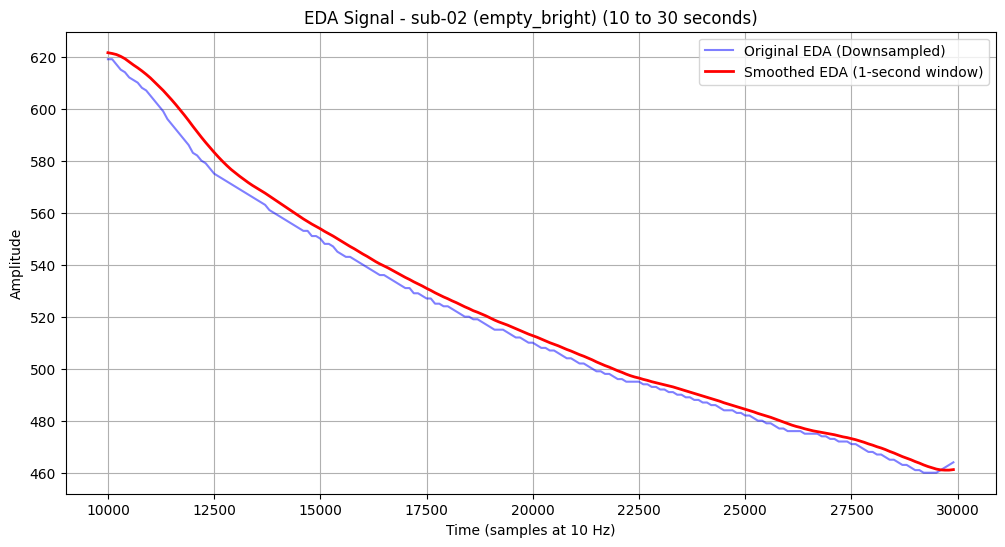

Processed /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_empty-bright_eda.csv
Original shape: 299000
Downsampled shape: 2990
Moving average shape: 2990

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_empty-dark_eda.csv


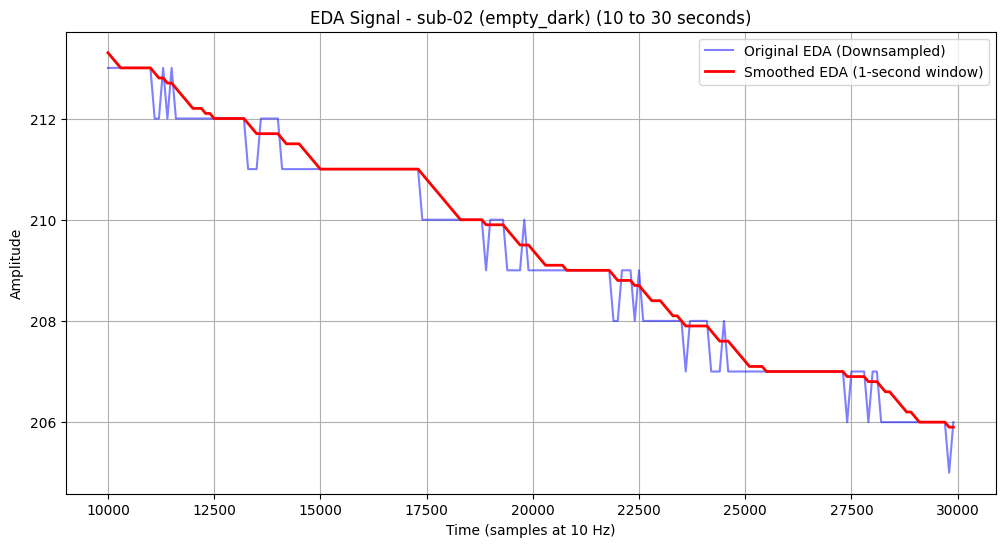

Processed /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_empty-dark_eda.csv
Original shape: 239000
Downsampled shape: 2390
Moving average shape: 2390

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_full-bright_eda.csv


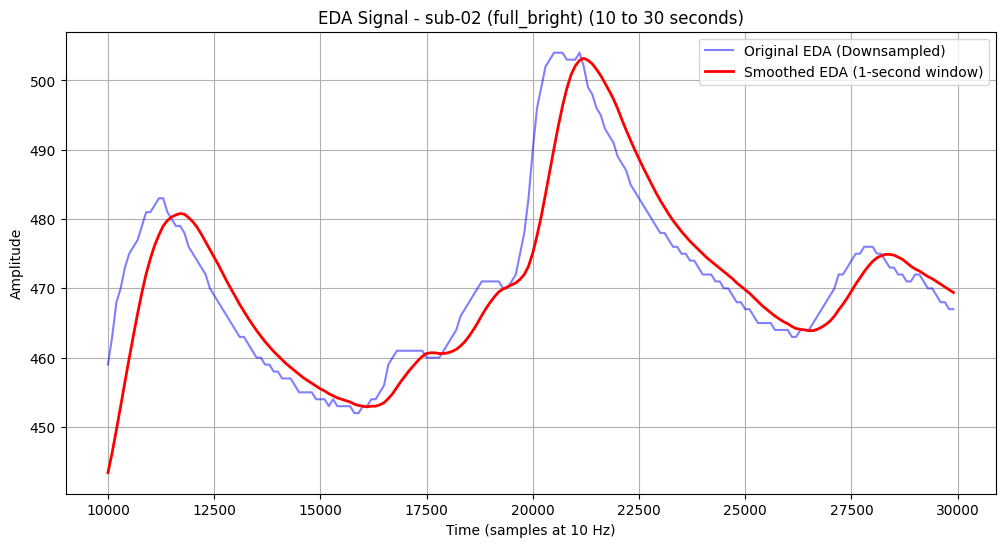

Processed /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_full-bright_eda.csv
Original shape: 359000
Downsampled shape: 3590
Moving average shape: 3590

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_full-dark_eda.csv


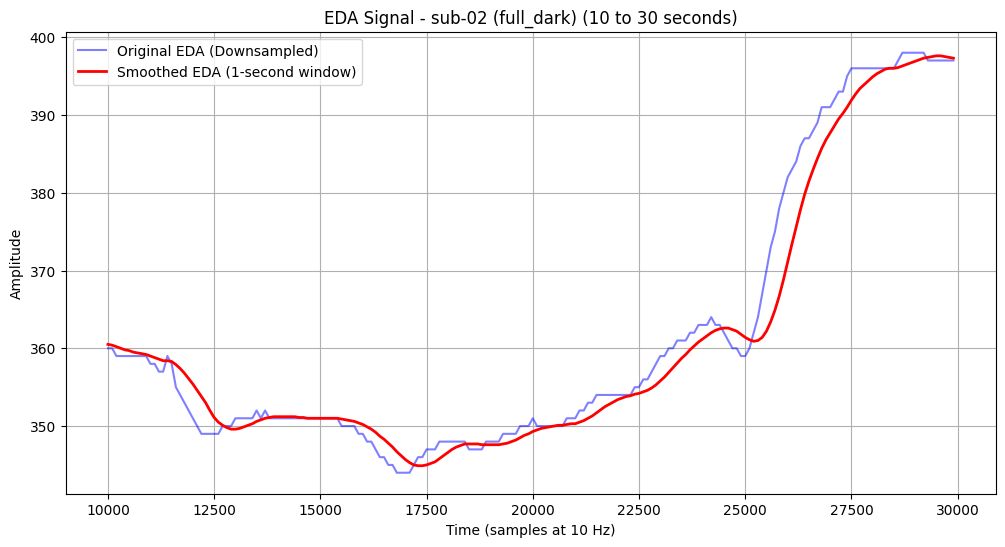

Processed /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_full-dark_eda.csv
Original shape: 180000
Downsampled shape: 1800
Moving average shape: 1800


In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pickle
import os

# File paths
raw_data_folder = '/Users/firefly/Desktop/Team_Messung/data/rawdata'
derivative_folder = '/Users/firefly/Desktop/Team_Messung/data/preprocessed-data'

# Parameters
participants = ['sub-01', 'sub-02']
conditions1 = ['empty', 'full']
conditions2 = ['bright', 'dark']

# List to store all processed data
all_processed_eda = []

# Process each participant and condition
for pi in participants:
    for c1 in conditions1:
        for c2 in conditions2:
            # Assemble file name
            filename = f"{raw_data_folder}/{pi}_{c1}-{c2}_eda.csv"
            print(f'\nProcessing: {filename}')
            
            try:
                # Read EDA data
                eda_data = pd.read_csv(filename)
                
                # Downsample from 1000 Hz to 10 Hz
                downsample_factor = 100  # From 1000 Hz to 10 Hz
                eda_data_downsampled = eda_data.iloc[::downsample_factor]
                
                # Ensure correct column name
                eda_data_downsampled.columns = ['EDA']
                
                # Apply moving average (1-second window at 10 Hz)
                window_size = 10  # 1-second window for smoothing
                eda_data_movav = eda_data_downsampled['EDA'].rolling(window=window_size).mean()
                
                # Store processed data
                processed_data = {
                    'participant': pi,
                    'condition': f"{c1}_{c2}",
                    'raw_downsampled': eda_data_downsampled,
                    'smoothed': eda_data_movav
                }
                all_processed_eda.append(processed_data)
                
                # Plot a segment (10 to 30 seconds) for visualization
                sampling_rate = 10  # Hz
                start_index = 10 * sampling_rate
                end_index = 30 * sampling_rate
                
                # Extract subsets
                subset = eda_data_downsampled.iloc[start_index:end_index].copy()
                movavsubset = eda_data_movav.iloc[start_index:end_index].copy()
                
                # Create plot
                plt.figure(figsize=(12, 6))
                plt.plot(subset['EDA'], 
                        label='Original EDA (Downsampled)',
                        alpha=0.5, color='blue')
                plt.plot(movavsubset,
                        label='Smoothed EDA (1-second window)',
                        color='red', linewidth=2)
                
                plt.title(f"EDA Signal - {pi} ({c1}_{c2}) (10 to 30 seconds)")
                plt.xlabel("Time (samples at 10 Hz)")
                plt.ylabel("Amplitude")
                plt.legend()
                plt.grid(True)
                plt.show()
                
                print(f"Processed {filename}")
                print(f"Original shape: {len(eda_data)}")
                print(f"Downsampled shape: {len(eda_data_downsampled)}")
                print(f"Moving average shape: {len(eda_data_movav)}")
                
            except FileNotFoundError:
                print(f'File not found: {filename}')
                continue
            except Exception as e:
                print(f'Error processing {filename}: {str(e)}')
                continue

# Create preprocessed data directory if it doesn't exist
os.makedirs(derivative_folder, exist_ok=True)



In [2]:
# Save all processed data
output_filename = f"{derivative_folder}/preprocessed_eda.pkl"
with open(output_filename, 'wb') as f:
    pickle.dump(all_processed_eda, f)

print(f"\nPreprocessed EDA data saved to: {output_filename}")


Preprocessed EDA data saved to: /Users/firefly/Desktop/Team_Messung/data/preprocessed-data/preprocessed_eda.pkl
